In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv("iris.data", header = None , sep=',')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'sepal_length vs sepal_width before clustering')

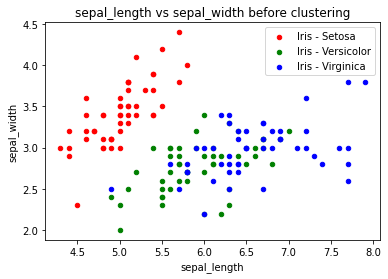

In [4]:
ax = df[df.species=='Iris-setosa'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='Iris - Setosa')
df[df.species=='Iris-versicolor'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.species=='Iris-virginica'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("sepal_length vs sepal_width before clustering")

Text(0.5, 1.0, 'petal_length vs petal_width before clustering')

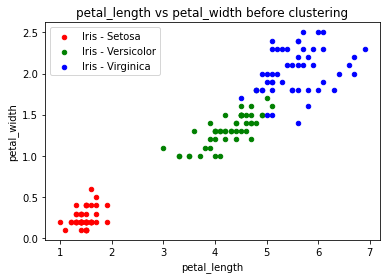

In [5]:
ax = df[df.species=='Iris-setosa'].plot.scatter(x='petal_length', y='petal_width', 
                                                    color='red', label='Iris - Setosa')
df[df.species=='Iris-versicolor'].plot.scatter(x='petal_length', y='petal_width', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.species=='Iris-virginica'].plot.scatter(x='petal_length', y='petal_width', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("petal_length vs petal_width before clustering")

In [6]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
s_val = df.iloc[:, -1].values
print("These are the values of the target in the dataset:")
s_val


These are the values of the target in the dataset:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df.drop(['species'],axis='columns',inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
print("These are the values of the target variables after Clustering:")
yp

These are the values of the target variables after Clustering:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
df['cluster']=yp
df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
print("These are the centroids of the 3 clusters:")
km.cluster_centers_

These are the centroids of the 3 clusters:


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
df.cluster.unique()

array([1, 0, 2])

In [13]:
df1 = df[df.cluster==1]
df2 = df[df.cluster==0]
df3 = df[df.cluster==2]

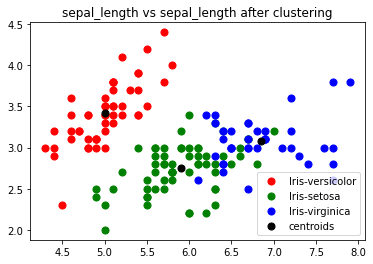

In [14]:
plt.scatter(df1['sepal_length'],df1['sepal_width'],color='red',s=50,label='Iris-versicolor')
plt.scatter(df2['sepal_length'],df2['sepal_width'],color='green',s=50,label='Iris-setosa')
plt.scatter(df3['sepal_length'],df3['sepal_width'],color='blue',s=50,label='Iris-virginica')
plt.title('sepal_length vs sepal_length after clustering')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',s=50, label='centroids')
plt.legend()

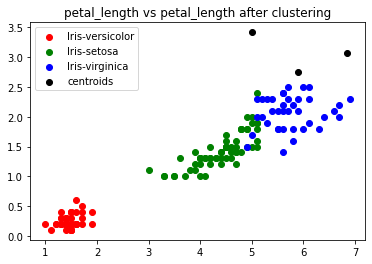

In [15]:
plt.scatter(df1['petal_length'],df1['petal_width'],color='red',label='Iris-versicolor')
plt.scatter(df2['petal_length'],df2['petal_width'],color='green',label='Iris-setosa')
plt.scatter(df3['petal_length'],df3['petal_width'],color='blue',label='Iris-virginica')
plt.title('petal_length vs petal_length after clustering')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black', label='centroids')
plt.legend()

In [16]:
pred = np.choose(km.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
sm.accuracy_score(pred, s_val)

0.8933333333333333

In [18]:
sm.confusion_matrix(pred,s_val)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\shriy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


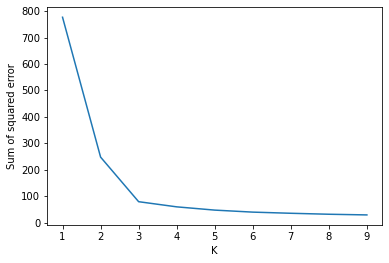

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)